In [154]:
# parse aggregate results
import os
import sys
from tensorflow.compat.v1 import gfile

sys.path.append(os.path.abspath("/home/mwu34/disentanglement_lib"))
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
df = pd.read_json("/home/mwu34/disentanglement_lib/results.json")

In [144]:
sorted(df[df['train_config.vae.beta'] == 8]['train_config.deconv_decoder.num_parameters_scale'].unique() * 32 - 1 + 64)

[65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0]

In [152]:
# df_cleaned[df_cleaned['evaluation_results.discrete_mig'].notna()].sort_values(X_var).reset_index().head(50)
def plot_metric_against_scale(df, column_names, map_column_names_to_ylabels, beta_values):
    """for each column in column_names, create a subfigure against scale"""
    fig_row_length = (len(column_names) + 1) // 2
    fig, axs = plt.subplots(fig_row_length, 2, figsize=(10, 10))
    for subplot_idx, col in enumerate(column_names):
        ax = axs[subplot_idx // 2, subplot_idx % 2]
        for beta in beta_values:
            df_cleaned = df[
                (df['postprocess_config.postprocess.name'] == "'mean'")
                & (df['train_config.vae.beta'] == beta)
                & (df[col].notna())
            ].sort_values('train_config.deconv_decoder.num_parameters_scale')
            ax.plot(
                df_cleaned['train_config.deconv_decoder.num_parameters_scale'],
                df_cleaned[col]
            )
        ax.set_ylabel(map_column_names_to_ylabels[col])
        ax.set_xlabel('scale')
    axs[0, 0].legend(beta_values)
        


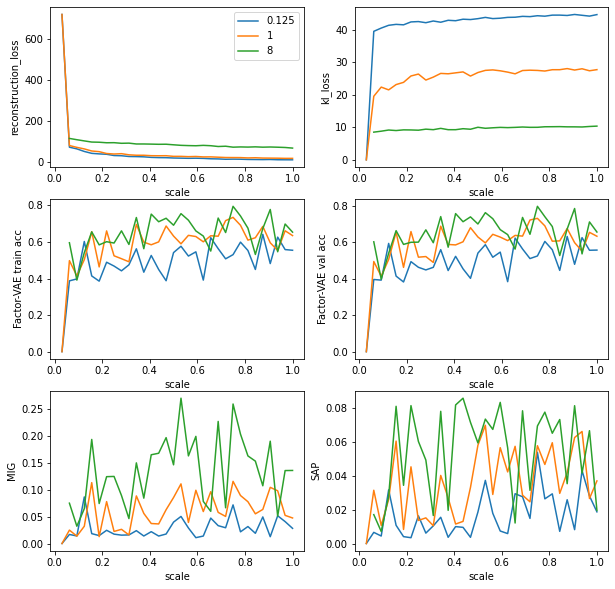

In [153]:
column_names = [
    'train_results.reconstruction_loss',
    'train_results.kl_loss',
    'evaluation_results.train_accuracy', # factor-VAE
    'evaluation_results.eval_accuracy', # factor-VAE
    'evaluation_results.discrete_mig', # MIG
    'evaluation_results.SAP_score', # SAP
]
map_column_names_to_ylabels = {
    'train_results.reconstruction_loss': 'reconstruction_loss',
    'train_results.kl_loss': 'kl_loss',
    'evaluation_results.train_accuracy': 'Factor-VAE train acc', # factor-VAE
    'evaluation_results.eval_accuracy': 'Factor-VAE val acc', # factor-VAE
    'evaluation_results.discrete_mig': 'MIG', # MIG
    'evaluation_results.SAP_score': 'SAP', # SAP
}
plot_metric_against_scale(df, column_names, map_column_names_to_ylabels, beta_values=[0.125, 1, 8])

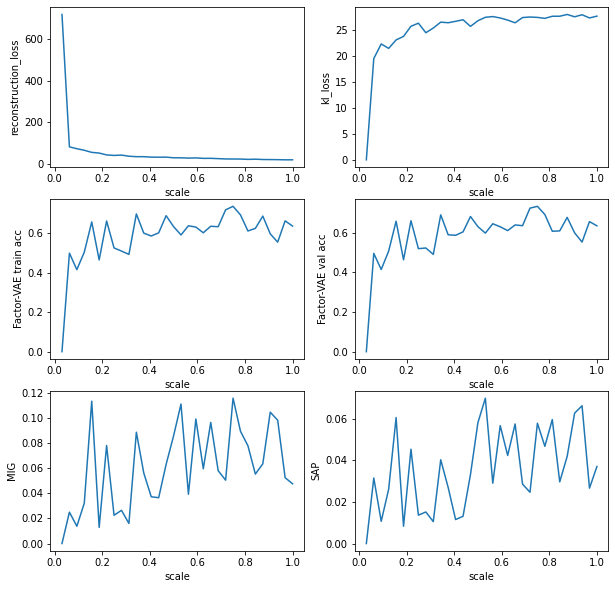

In [141]:
column_names = [
    'train_results.reconstruction_loss',
    'train_results.kl_loss',
    'evaluation_results.train_accuracy', # factor-VAE
    'evaluation_results.eval_accuracy', # factor-VAE
    'evaluation_results.discrete_mig', # MIG
    'evaluation_results.SAP_score', # SAP
]
map_column_names_to_ylabels = {
    'train_results.reconstruction_loss': 'reconstruction_loss',
    'train_results.kl_loss': 'kl_loss',
    'evaluation_results.train_accuracy': 'Factor-VAE train acc', # factor-VAE
    'evaluation_results.eval_accuracy': 'Factor-VAE val acc', # factor-VAE
    'evaluation_results.discrete_mig': 'MIG', # MIG
    'evaluation_results.SAP_score': 'SAP', # SAP
}
plot_metric_against_scale(df, column_names, map_column_names_to_ylabels, beta_value=1)

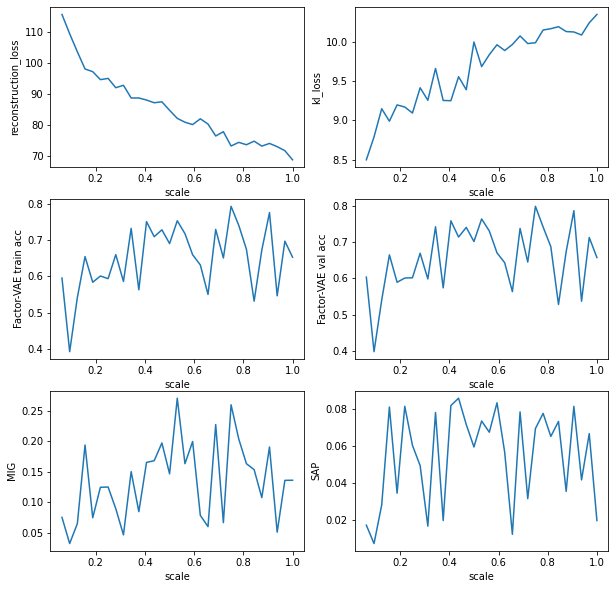

In [146]:
column_names = [
    'train_results.reconstruction_loss',
    'train_results.kl_loss',
    'evaluation_results.train_accuracy', # factor-VAE
    'evaluation_results.eval_accuracy', # factor-VAE
    'evaluation_results.discrete_mig', # MIG
    'evaluation_results.SAP_score', # SAP
]
map_column_names_to_ylabels = {
    'train_results.reconstruction_loss': 'reconstruction_loss',
    'train_results.kl_loss': 'kl_loss',
    'evaluation_results.train_accuracy': 'Factor-VAE train acc', # factor-VAE
    'evaluation_results.eval_accuracy': 'Factor-VAE val acc', # factor-VAE
    'evaluation_results.discrete_mig': 'MIG', # MIG
    'evaluation_results.SAP_score': 'SAP', # SAP
}
plot_metric_against_scale(df, column_names, map_column_names_to_ylabels, beta_value=8)

In [119]:
# factor VAE train and val acc are different but really close

df_cleaned = df[
    (df['postprocess_config.postprocess.name'] == "'mean'")
    & (df['train_config.vae.beta'] == 0.125)
    & (df['evaluation_results.train_accuracy'].notna())
].sort_values('train_config.deconv_decoder.num_parameters_scale')
df_cleaned[['evaluation_results.train_accuracy', 'evaluation_results.eval_accuracy']]

,evaluation_results.train_accuracy,evaluation_results.eval_accuracy
244,0.0000,0.0000
356,0.3872,0.3966
268,0.3977,0.3932
372,0.6025,0.5948
172,0.4140,0.4152
100,0.3857,0.3830
380,0.4890,0.4946
52,0.4681,0.4636
36,0.4420,0.4492
116,0.4748,0.4634
